# Data generation for Figure 1

Imports

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ipywidgets import interact, interactive
import sys

# Imports from epistasis API
from epistasis.plotting.coefs import coefs
from epistasis.stats import pearson
from epistasis.simulate.additive import AdditiveSimulation
from epistasis.simulate.nonlinear import NonlinearSimulation
from epistasis.models.linear import EpistasisLinearRegression
from epistasis.models.nonlinear.power import EpistasisPowerTransform

In [4]:
def function(x, k):
    return ((k+1)*x) / (k*x + 1) 

## Initialize a genotype-phenotype map with epistasis.

In [11]:
# Length of genotypes
length = 5
# Order of epistasis
order = 1 
# Construct a simulated epistatic genotype-phenotype map.
initial = AdditiveSimulation.from_length(length, model_type="global")
initial.set_coefs_order(1)
initial.set_coefs_random((-0.15, 0.15))
initial.epistasis.values[0] = 0.5 # Center the phenotypes at 0.5
initial.build()

The actual epistatic coefs set in the paper were:
```python
>>> initial.epistasis.values = np.array([ 0.5, -0.13463125, 0.12698641, 0.02709926, 0.09493059, 0.10254137])
```

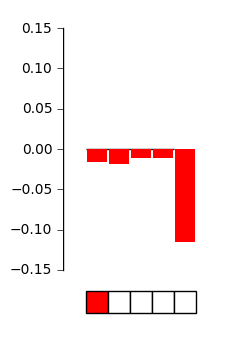

In [19]:
fig, ax = coefs(initial.epistasis.values, initial.epistasis.labels, 
    figsize=(2,4),
    y_axis_name="",
    height_ratio=1,
)

#fig.savefig(
#    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/additive-coeffs.svg", 
#    format="svg", 
#    bbox_height="tight"
#)

In [20]:
shape = 2
nonlinear = NonlinearSimulation.from_linear(initial, function=function, p0=(shape,))

NameError: name 'selfs' is not defined

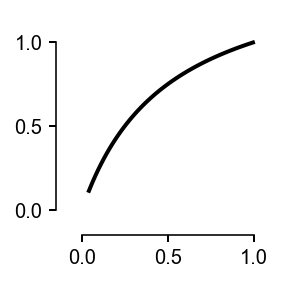

In [147]:
fig, ax = plt.subplots(figsize=[2,2])

x = np.linspace(min(nonlinear.phenotypes),  max(nonlinear.phenotypes), 100)
y = nonlinear.function(x, *nonlinear.parameters.get_params())
ax.plot(x, y, 'k-')
ax.axis([-0.15,1.15,-0.15,1.15])
ax.spines['bottom'].set_bounds(0,1.)
ax.spines['left'].set_bounds(0,1.)
ax.set_xticks([0,.5,1])
fig.savefig("/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/nonlinear-shape.svg", format="svg", bbox_height="tight")

In [ ]:
fig.savefig(
    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/nonlinear-shape.svg", 
    format="svg", 
    bbox_height="tight"
)

In [143]:
model = LinearEpistasisModel.from_gpm(nonlinear, model_type="global")
model.fit()

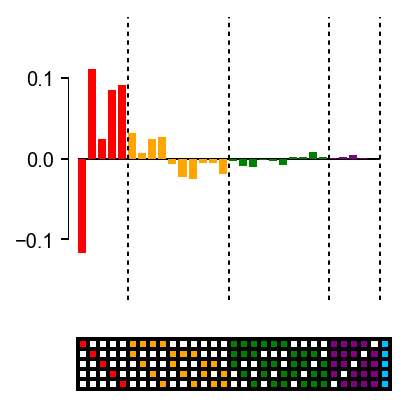

In [148]:
fig, ax = model.plot.epistasis(figsize=(3,3),     
    y_axis_name="",
    height_ratio=4,
)

In [ ]:
fig.savefig(
    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/linear-fit-coeffs.svg", 
    format="svg", 
    bbox_height="tight"
)